<a href="https://colab.research.google.com/github/kuramapw/rfslf/blob/master/QPSK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random     #инициализация необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

In [5]:
n=10                                             # n сигналов
fd=10**9  #частота дискретизации
fn=10**8  #частота несущей
els=5     #число периодов в элементарном сигнале
length=int(els*fd/fn) #число отсчетов
length

50

In [6]:
signal = [int(bool(random.randint(0,1))) for i in range(n)]   # рандомно заполняем массив сигналами от 0 до 1   
sigtemp = signal.copy()                                       
for i in range(n):                                            #делаем вспомогательный массив из -1 и +1
    if(sigtemp[i]==0):
        sigtemp[i]=-1
signaltemp=[]                                                 #делаем вспомогательный массив из пар битов [-1,1]
i=0
while i<n:
    signaltemp.append([sigtemp[i],sigtemp[i+1]])
    i=i+2
print(signal)
print(signaltemp)

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]
[[1, -1], [1, 1], [1, 1], [-1, 1], [1, 1]]


In [0]:
def QPSK(d1,d2,t,fn):                                       
    return  (2.**(-0.5))*(d1*np.cos(2.*np.pi*fn*t) + d2*np.sin(2.*np.pi*fn*t))

250 отсчетов
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]


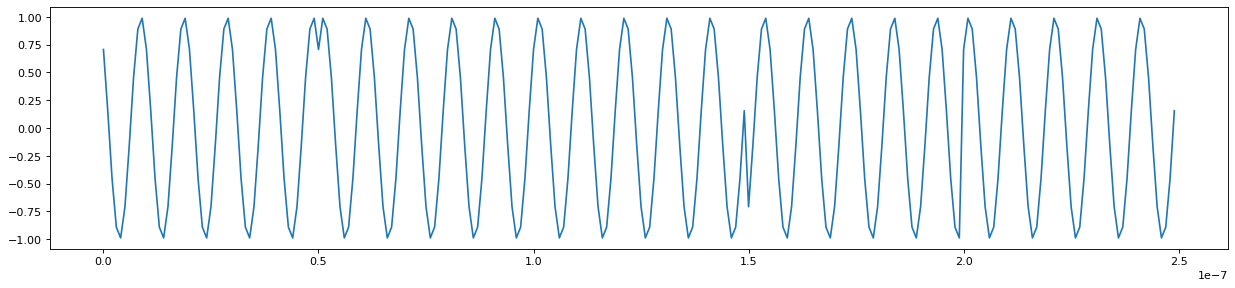

In [8]:
s=np.array([])
time=np.arange(0,int(length*n/2)/fd,1/fd)
i=0
while i<(n/2):
    t=time[i*length:length*(i+1)]
    temp1=QPSK( signaltemp[i][0] , signaltemp[i][1] , t , fn )
    s=np.append(s,temp1)
    i=i+1 
print(len(time),'отсчетов')
print(signal)

plt.figure(num=None, figsize=(19, 4), dpi=80) 
plt.plot(time, s)        
plt.show()


 

*   Почему получилось так угловато?
        Вроде 250 отсчетов при 10 битах,так почему же так резко график выглядит?
        А если частоту дискретизации поднять? А надо ли? 
        Но тут частота дискретизации высокая, 10**10
      

*  Точки строго на границах какие то не в тему
array рассмотреть
        написать прогу блок схему приемника ( см методичку)
        как по человечески умножать массив и число в питоне?
        как перемножать матрицы питон
        upd:с массивами разобрался, первое задание наконец полностью выполнено
*  теперь нужно решить обратную задачу, как?      
      так как идеальный сигнал идеален, можем посмотреть на элемент массива колебания с определенным периодом



In [27]:
s0=np.array([])
eps=0.1
i=0
step=int(np.size(s)/els)
while(i<np.size(s)):
    fi=np.arcsin(s[i]/(2**0.5))
    fi1=np.arcsin(s[i+1]/(2**0.5))
   # print(fi," ",fi1)
    if(fi<0 and fi1>fi):
        s0=np.append(s0,[0,1])
    if(fi<0 and fi1<fi):
        s0=np.append(s0,[0,0])
    if(fi>0 and fi1>fi):
        s0=np.append(s0,[1,1])
    if(fi>0 and fi1<fi):
        s0=np.append(s0,[1,0])
    #получаем пару бит
    i+=step
print(s0)
#print(np.append([],signal))

    

[1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]


0.6853981633974483